In [4]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import statsmodels.api as sm
import pylab
from scipy import stats
import sqlalchemy
import numpy as np

In [5]:
def node_trans(df):
    all_list=[]
    for i in range(df.shape[1]-1):
        for j in range(df.shape[0]):
            # print(i,j)
            h=tuple(str(i))+tuple(df.iloc[j,i:i+2])
            # print(h)
            all_list.append(h)
    set_list=list(set(all_list))
    set_list.sort(key = all_list.index)
    node_list = [i for i in set_list if np.nan not in i]
    return node_list

In [6]:
def node_code(df,chain_code,node_code_col,chain_name,father_node_name_col,node_name_col):
    chain_code=chain_code
    y=1
    for x in df.index:
        if df.loc[x,father_node_name_col]==chain_name:
            df.loc[x,node_code_col]=chain_code+'0'+str(y)
            y=y+1
#             print(node_gcjx_pd.loc[x,node_code_col])
    for x in df.index:
        for z in df.index:
            if df.loc[x,node_name_col]==df.loc[z,father_node_name_col]:
                t=t+1
                if t<10:
                    df.loc[z,node_code_col]=str(df.loc[x,node_code_col])+'0'+str(t)
                else:
                    df.loc[z,node_code_col]=str(df.loc[x,node_code_col])+str(t)
#                 print(str(node_gcjx_pd.loc[x,'node_code'])+'0'+str(t))
#                 print(node_gcjx_pd.loc[z,'father_node_name'])
#                 print(node_gcjx_pd.loc[x,'node_name'])
#                 print(node_gcjx_pd.loc[x,])
#                 print(t)  
            else:
                t=0
                continue
    return df

In [7]:
db = pymysql.connect(host='192.168.80.209',
                     user='root',
                     password='tiandao2020',
                     database='zhelixin_industry_crawler',
                     charset='utf8')
cursor = db.cursor()
cursor.execute("SELECT VERSION()")
data = cursor.fetchone()
print ("数据库连接成功！")

数据库连接成功！


集成电路产业链图谱

In [8]:
sql="select *  from crawler_standard_word "
cursor.execute(sql)
origin_sql = cursor.fetchall()
origin_pd=pd.DataFrame(list(origin_sql))

In [9]:
sql_desc="desc crawler_standard_word "
cursor.execute(sql_desc)
origin_desc=cursor.fetchall()
origin_desc_pd=pd.DataFrame(list(origin_desc))

In [10]:
origin_pd.columns=origin_desc_pd[0]

In [11]:
origin_pd

,id,std_id,std_word,parent_id,version,ctime,mtime,rtime,creater,updater,deleted
0,1,167,基础软件,165,None,None,None,None,None,None,None
1,2,2134,稳压芯片,2115,None,None,None,None,None,None,None
2,3,890,天然浮石,884,None,None,None,None,None,None,None
3,4,1857,航标用铅酸蓄电池,1850,None,None,None,None,None,None,None
4,5,1075,数字出版服务,998,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
24097,24098,20824,注射用琥珀氯霉素,20823,None,None,None,None,None,None,None
24098,24099,20825,棕榈氯霉素片,20823,None,None,None,None,None,None,None
24099,24100,21071,长春西汀片,21069,None,None,None,None,None,None,None
24100,24101,21308,糖尿病用药,20907,None,None,None,None,None,None,None


In [13]:
target_chain_pd=pd.DataFrame(columns=list(origin_pd.columns))

In [14]:
# target_chain_pd=origin_pd[origin_pd.index==-1]
chain_name='环保设备'
parent_id_list=['7000']
for x in range(20):
    std_id_list=parent_id_list
    parent_id_list=[]
    for m in std_id_list:
#         print(m)
        for n in origin_pd.index:
            if  origin_pd.loc[n,'parent_id']==m:       
#                 print(origin_pd[origin_pd.index==n])
#                 target_chain_pd=target_chain_pd.append(origin_pd[origin_pd.index==n],ignore_index=False)
                target_chain_pd=pd.concat([target_chain_pd,origin_pd[origin_pd.index==n]])
                target_chain_pd.loc[n,'node_col_rank']=x
                parent_id_list.append(origin_pd.loc[n,'std_id'])

In [58]:
for m in target_chain_pd.index:
    for n in origin_pd.index:
        if target_chain_pd.loc[m,'parent_id']==origin_pd.loc[n,'std_id']:
            target_chain_pd.loc[m,'parent_word']=origin_pd.loc[n,'std_word']
#             print(target_chain_pd.loc[m,'parent_word'])

In [17]:
tgt_chain_pd=target_chain_pd[['node_col_rank','parent_id','parent_word','std_id','std_word']]
tgt_chain_pd.to_excel(r'C:\Users\admin\Documents\GitHub\yiheng\ths_chain\tgt_chain_jnhb.xlsx')

In [34]:
edges_list=list(zip(tgt_chain_pd.parent_word,tgt_chain_pd.std_word))
edges_list=[x for x in edges_list if np.nan not in x ]
node_list=list(set(tgt_chain_pd.std_word))

In [37]:
edges_list

[('环保设备', '节能环保设备'),
 ('环保设备', '大气污染防治设备'),
 ('环保设备', '固体废弃物处理设备'),
 ('环保设备', '资源再利用设备'),
 ('环保设备', '水资源专用机械制造'),
 ('环保设备', '其他环保设备'),
 ('环保设备', '环境监测仪器'),
 ('环保设备', '隔音减振设备'),
 ('大气污染防治设备', '大气环境治理设备'),
 ('大气污染防治设备', '室内空气洁净设备'),
 ('固体废弃物处理设备', '废弃物专用处理机械'),
 ('固体废弃物处理设备', '生活固体废弃物处理设备'),
 ('资源再利用设备', '拆解设备'),
 ('资源再利用设备', '回收利用设备'),
 ('水资源专用机械制造', '水处理设备'),
 ('水资源专用机械制造', '供水设备'),
 ('水资源专用机械制造', '节水设备'),
 ('水资源专用机械制造', '引水设备'),
 ('其他环保设备', '粉体造粒机'),
 ('环境监测仪器', '气体监测分析仪器'),
 ('环境监测仪器', '水质监测仪器'),
 ('环境监测仪器', '噪声监测仪器'),
 ('环境监测仪器', '振动监测仪器'),
 ('环境监测仪器', '放射性监测仪器'),
 ('环境监测仪器', '电磁波监测仪器'),
 ('隔音减振设备', '隔音设备'),
 ('隔音减振设备', '减振设备'),
 ('大气环境治理设备', '工业废气处理设备'),
 ('大气环境治理设备', '其他大气污染处理设备'),
 ('大气环境治理设备', '废气除臭设备'),
 ('室内空气洁净设备', '空气净化装置'),
 ('室内空气洁净设备', '油烟净化设备'),
 ('室内空气洁净设备', '风机过滤单元'),
 ('室内空气洁净设备', '工商用空气过滤器'),
 ('废弃物专用处理机械', '废弃物压缩装置'),
 ('废弃物专用处理机械', '废弃物破碎机'),
 ('废弃物专用处理机械', '废弃物筛分机'),
 ('废弃物专用处理机械', '永磁滚筒'),
 ('废弃物专用处理机械', '灰渣处理设备'),
 ('废弃物专用处理机械', '热解设备'),
 ('废弃物专用处理机械', '污泥处理设备')

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

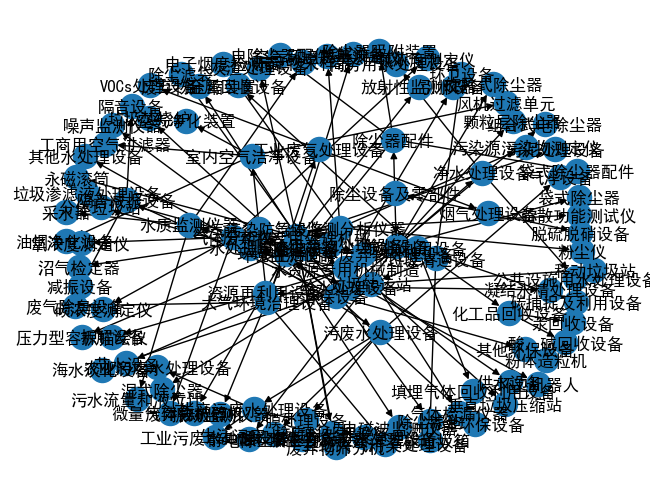

In [57]:
tree = nx.DiGraph()
tree.add_nodes_from(['环保设备'])
tree.add_nodes_from(node_list)
tree.add_edges_from(edges_list)
pos = nx.spring_layout(tree)
nx.draw(tree, pos, with_labels=True, font_weight='bold')
plt.show()

In [62]:
max_rank=max(tgt_chain_pd.node_col_rank)

In [ ]:
target_chain_grid=pd.DataFrame()

In [ ]:
target_chain_grid

for x in range(max_rank+1):
    if x==0:
        
    
    for m in tgt_chain_pd.index:
        for n in tgt_chain_pd.index:

            
        if tgt_chain_pd.loc[m,'node_col_rank']==x and x==0:
            target_chain_grid.loc[m,x+'node']=tgt_chain_pd.loc[m,'std_word'] 

In [65]:
for x in range(7,-1,-1):
    print(x)

7
6
5
4
3
2
1
0
